##                           **BITCOIN PRICE PREDICTION**




Bitcoin is a type of digital asset that uses public-key cryptography to record, sign and send transactions over the Bitcoin blockchain. Its the world's first decentralized cryptocurrency.
In this project, we will view the trends in price of bitcoin and try to predict its variations for the next 30 days using a suitable model.

# Importing Libraries


In [1]:
import numpy as np

import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import r2_score,mean_squared_error


from datetime import datetime


# Importing dataset

In [2]:
from google.colab import files

uploaded=files.upload()

import io

df=pd.read_csv(io.BytesIO(uploaded['bitcoin.csv']))

Saving bitcoin.csv to bitcoin.csv


# Data Wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276866 entries, 0 to 276865
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         276866 non-null  int64  
 1   Timestamp          276866 non-null  int64  
 2   Open               276866 non-null  float64
 3   High               276866 non-null  float64
 4   Low                276866 non-null  float64
 5   Close              276866 non-null  float64
 6   Volume_(BTC)       276866 non-null  float64
 7   Volume_(Currency)  276866 non-null  float64
 8   Weighted_Price     276866 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 19.0 MB


In [4]:
df.describe()

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,276866.000000,2.768660e+05,276866.000000,276866.000000,276866.000000,276866.000000,276866.000000,2.768660e+05,276866.000000
mean,138432.500000,1.475536e+09,3898.375518,3908.786492,3887.336767,3898.470747,109.988716,3.444010e+05,3898.121080
std,79924.474152,7.645154e+07,6849.737371,6871.143834,6827.992227,6850.220090,216.980364,8.839427e+05,6849.761874
min,0.000000,1.325242e+09,3.800000,4.140000,3.800000,4.140000,0.000000,0.000000e+00,3.870000
25%,69216.250000,1.410430e+09,316.780000,317.782500,315.652500,316.760000,18.650000,1.003947e+04,316.660000
50%,138432.500000,1.472632e+09,714.000000,715.595000,711.855000,714.020000,47.750000,5.949789e+04,713.930000
75%,207648.750000,1.542161e+09,6542.877500,6552.680000,6532.750000,6543.220000,115.107500,2.991222e+05,6542.747500
max,276865.000000,1.617149e+09,61615.510000,61781.830000,61350.300000,61627.260000,11166.690000,3.449055e+07,61608.640000


Checking for null values 

In [5]:
df.isnull().sum()

Unnamed: 0           0
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

There are no null values

In [6]:
df.head()

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,0,1325241900,4.26,4.26,4.21,4.21,12.33,51.96,4.21
1,1,1325253600,4.50,4.50,4.50,4.50,4.20,18.90,4.50
2,2,1325258100,4.21,4.21,4.21,4.21,39.77,167.43,4.21
3,3,1325259000,4.21,4.21,4.21,4.21,0.44,1.85,4.21
4,4,1325317500,4.39,4.39,4.39,4.39,0.46,2.00,4.39


Converting unix time to date time format

In [7]:

def timestampToDateTime(timestamp):
    from datetime import datetime
    return datetime.fromtimestamp(timestamp)
df['Date']=df['Timestamp'].apply(timestampToDateTime)

Setting the index as date

In [8]:
timeindex=pd.DatetimeIndex(df['Date'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'],unit='s')
df.set_index(timeindex,inplace=True)

In [9]:
df['Year']=df['Date'].dt.year
df.tail(3)

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Year
Date,,,,,,,,,,,
2021-03-30 23:30:00,276863,2021-03-30 23:30:00,58766.56,58766.56,58599.78,58600.00,24.67,1446170.82,58619.58,2021-03-30 23:30:00,2021
2021-03-30 23:45:00,276864,2021-03-30 23:45:00,58599.99,58770.38,58599.99,58760.59,40.11,2353284.47,58669.39,2021-03-30 23:45:00,2021
2021-03-31 00:00:00,276865,2021-03-31 00:00:00,58767.75,58931.24,58718.17,58887.18,26.05,1532169.96,58813.66,2021-03-31 00:00:00,2021


In [10]:
df['Date'] = df['Timestamp'].dt.strftime('%Y-%m-%d')
df.tail()

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Year
Date,,,,,,,,,,,
2021-03-30 23:00:00,276861,2021-03-30 23:00:00,58699.43,58734.72,58567.11,58733.62,7.85,460410.98,58628.91,2021-03-30,2021
2021-03-30 23:15:00,276862,2021-03-30 23:15:00,58704.85,58748.45,58573.63,58748.45,5.69,334078.89,58662.70,2021-03-30,2021
2021-03-30 23:30:00,276863,2021-03-30 23:30:00,58766.56,58766.56,58599.78,58600.00,24.67,1446170.82,58619.58,2021-03-30,2021
2021-03-30 23:45:00,276864,2021-03-30 23:45:00,58599.99,58770.38,58599.99,58760.59,40.11,2353284.47,58669.39,2021-03-30,2021
2021-03-31 00:00:00,276865,2021-03-31 00:00:00,58767.75,58931.24,58718.17,58887.18,26.05,1532169.96,58813.66,2021-03-31,2021


In [11]:
df.drop('Timestamp',axis=1,inplace=True)

In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 276866 entries, 2011-12-30 10:45:00 to 2021-03-31 00:00:00
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Open               276866 non-null  float64
 1   High               276866 non-null  float64
 2   Low                276866 non-null  float64
 3   Close              276866 non-null  float64
 4   Volume_(BTC)       276866 non-null  float64
 5   Volume_(Currency)  276866 non-null  float64
 6   Weighted_Price     276866 non-null  float64
 7   Date               276866 non-null  object 
 8   Year               276866 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 21.1+ MB


Converting date column values to string type

In [14]:
df['Date']=df['Date'].apply(lambda x:str(x[:10]))
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Year
Date,,,,,,,,,
2011-12-30 10:45:00,4.26,4.26,4.21,4.21,12.33,51.96,4.21,2011-12-30,2011
2011-12-30 14:00:00,4.50,4.50,4.50,4.50,4.20,18.90,4.50,2011-12-30,2011
2011-12-30 15:15:00,4.21,4.21,4.21,4.21,39.77,167.43,4.21,2011-12-30,2011
2011-12-30 15:30:00,4.21,4.21,4.21,4.21,0.44,1.85,4.21,2011-12-30,2011
2011-12-31 07:45:00,4.39,4.39,4.39,4.39,0.46,2.00,4.39,2011-12-31,2011


In [15]:
df.set_index(df['Date'],inplace= True)
#both the index and column have the same name(Date)
df.rename(columns={'Date':'date'},inplace=True)

In [16]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date,Year
Date,,,,,,,,,
2011-12-30,4.26,4.26,4.21,4.21,12.33,51.96,4.21,2011-12-30,2011
2011-12-30,4.50,4.50,4.50,4.50,4.20,18.90,4.50,2011-12-30,2011
2011-12-30,4.21,4.21,4.21,4.21,39.77,167.43,4.21,2011-12-30,2011
2011-12-30,4.21,4.21,4.21,4.21,0.44,1.85,4.21,2011-12-30,2011
2011-12-31,4.39,4.39,4.39,4.39,0.46,2.00,4.39,2011-12-31,2011


In [17]:
df['month'] = df['date'].apply(lambda x: int(str(x[5:7])))
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date,Year,month
Date,,,,,,,,,,
2011-12-30,4.26,4.26,4.21,4.21,12.33,51.96,4.21,2011-12-30,2011,12
2011-12-30,4.50,4.50,4.50,4.50,4.20,18.90,4.50,2011-12-30,2011,12
2011-12-30,4.21,4.21,4.21,4.21,39.77,167.43,4.21,2011-12-30,2011,12
2011-12-30,4.21,4.21,4.21,4.21,0.44,1.85,4.21,2011-12-30,2011,12
2011-12-31,4.39,4.39,4.39,4.39,0.46,2.00,4.39,2011-12-31,2011,12


# Data Visualisation

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


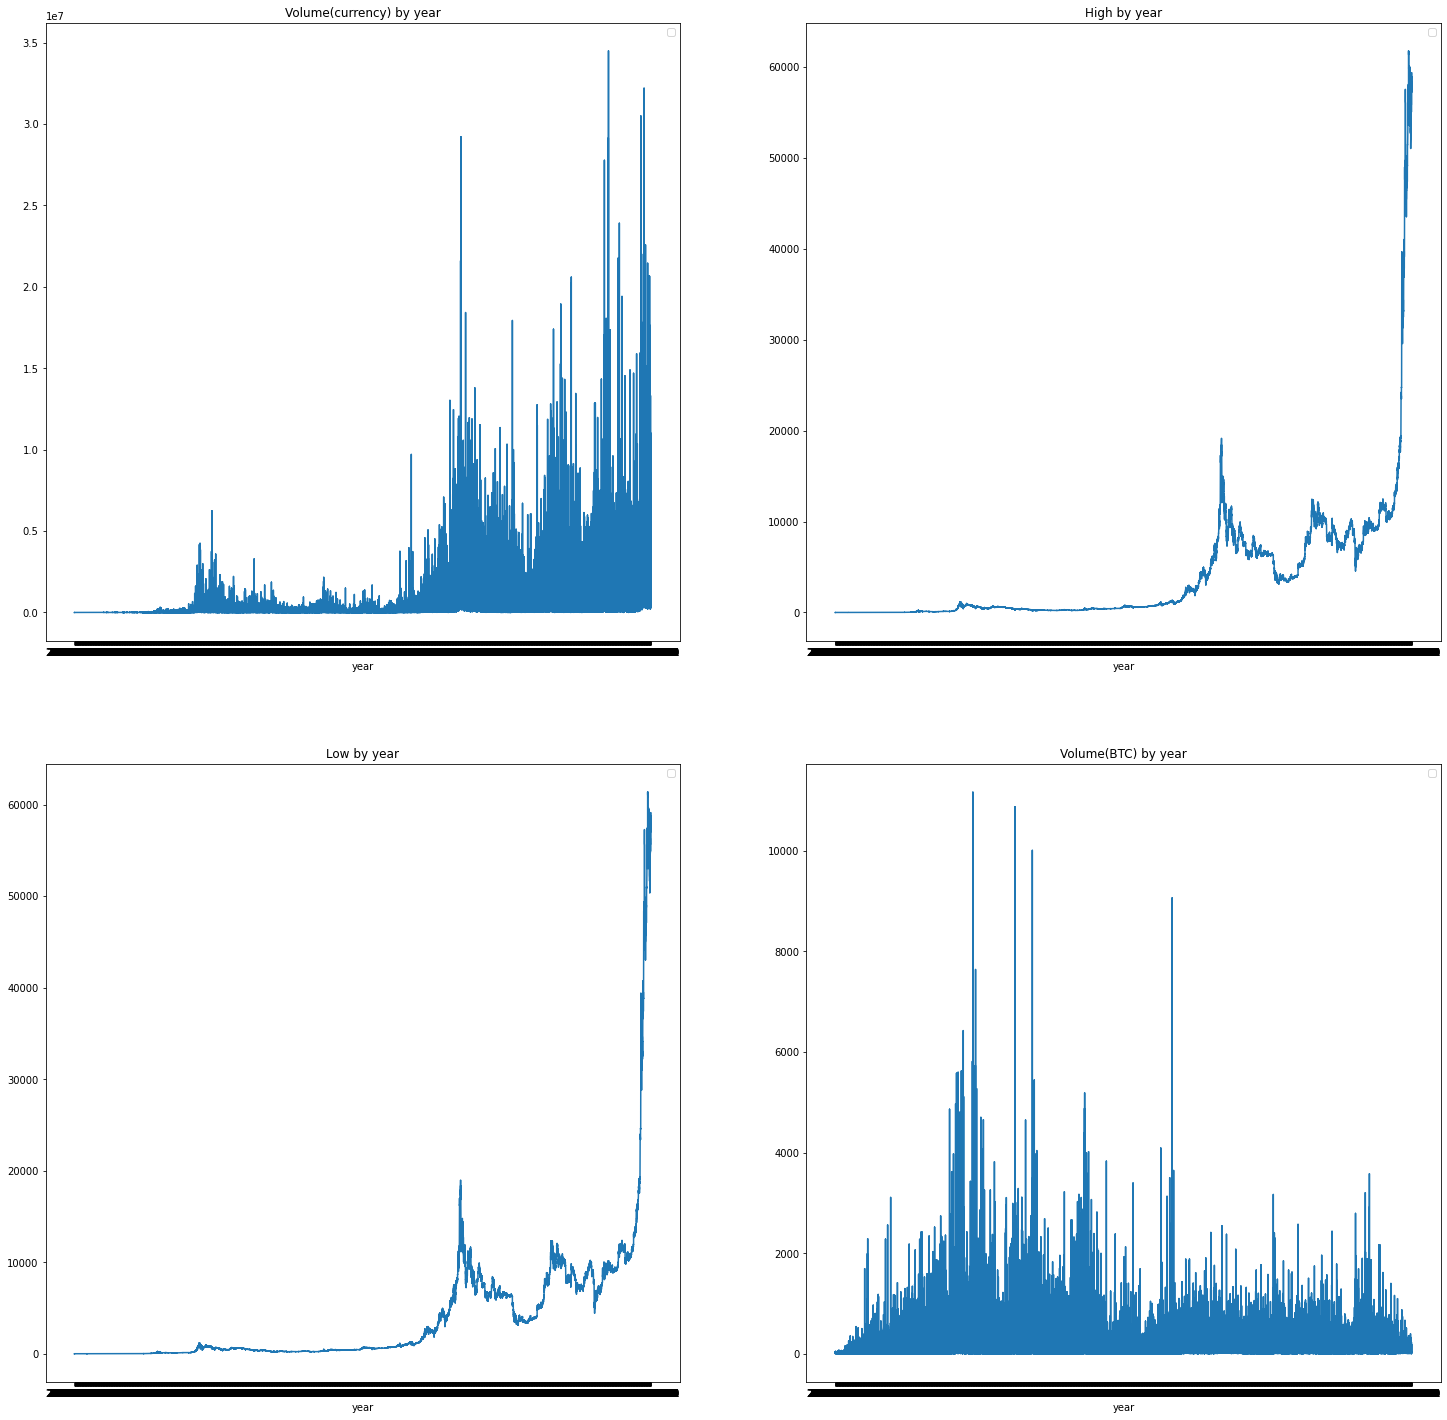

In [18]:
fig=plt.figure(figsize=(25,25))

plt.subplot(221)
plt.title('Volume(currency) by year')
plt.xlabel('year')
plt.legend()
plt.plot(df['Volume_(Currency)'])
plt.subplot(222)
plt.title('High by year')
plt.xlabel('year')
plt.legend()
plt.plot(df['High'])
plt.subplot(223)
plt.title('Low by year')
plt.xlabel('year')
plt.legend()
plt.plot(df['Low'])
plt.subplot(224)
plt.title('Volume(BTC) by year')
plt.xlabel('year')
plt.legend()
plt.plot(df['Volume_(BTC)'])
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


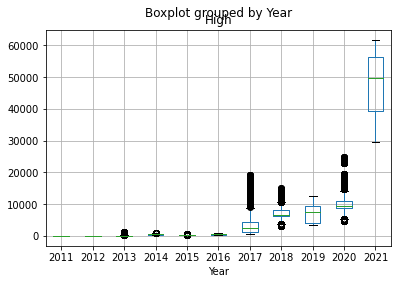

In [19]:
df.boxplot(column='High',by='Year')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


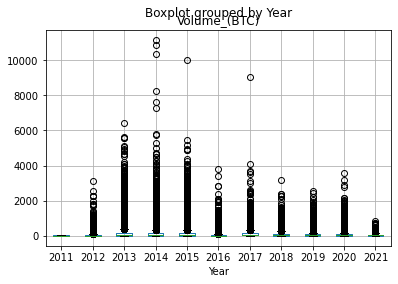

In [20]:
df.boxplot(column='Volume_(BTC)',by='Year')

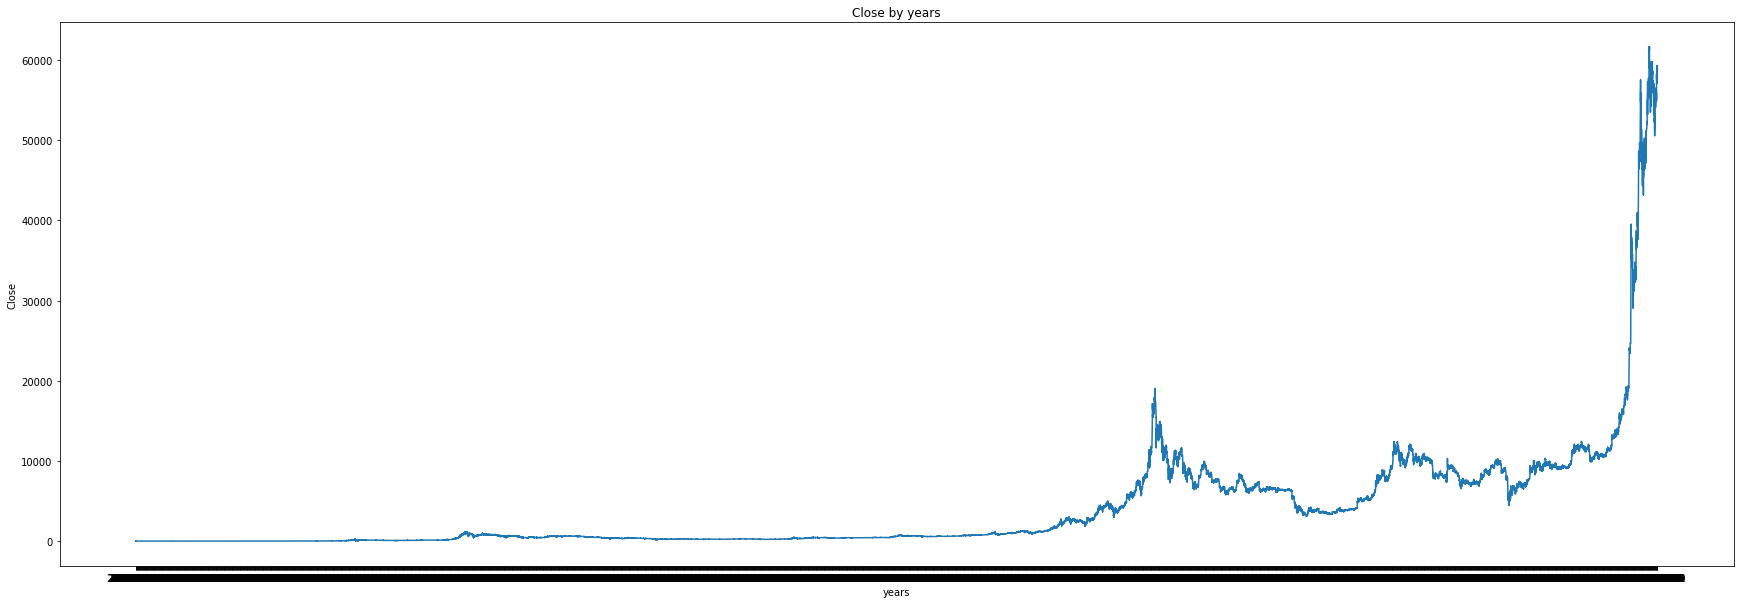

In [21]:

plt.figure(figsize=(30,10))
plt.xlabel('years')
plt.ylabel('Close')
plt.title('Close by years')
plt.plot(df['Close'])

In [22]:
df.corr().head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Year,month
Open,1.000000,0.999993,0.999991,0.999987,-0.056646,0.505888,0.999993,0.650401,-0.056091
High,0.999993,1.000000,0.999987,0.999993,-0.056074,0.507111,0.999996,0.650067,-0.056255
Low,0.999991,0.999987,1.000000,0.999993,-0.057390,0.504334,0.999997,0.650727,-0.055938
Close,0.999987,0.999993,0.999993,1.000000,-0.056715,0.505800,0.999997,0.650379,-0.056096
Volume_(BTC),-0.056646,-0.056074,-0.057390,-0.056715,1.000000,0.344510,-0.056752,-0.088803,0.030698


The column we want to predict is Close

# Building the model

# 1)RNN(Simple)

In [23]:
#RNN
from keras.models import Sequential
from keras.layers import LSTM,Dense,GRU,SimpleRNN,Dropout,Flatten

from sklearn.preprocessing import MinMaxScaler,StandardScaler
min_max_scaler = MinMaxScaler()
import math


from pandas import Series

In [24]:

std=StandardScaler()
dfc=df.copy()
X=dfc.groupby('date')['Close'].max()

train_size = int(len(X)*0.8)

train_data = X[0:train_size]
test_data = X[train_size:]

train_data=np.array(train_data)
train_data=train_data.reshape(train_data.shape[0],1)
train_data=std.fit_transform(train_data)

In [25]:
timestep=30
x_train_rnn=[]
y_train_rnn=[]
# creating new sample points
for i in range(timestep,train_data.shape[0]):
    x_train_rnn.append(train_data[i-timestep:i,0])
    y_train_rnn.append(train_data[i,0])

x_train_rnn,y_train_rnn=np.array(x_train_rnn),np.array(y_train_rnn)
x_train_rnn=x_train_rnn.reshape(x_train_rnn.shape[0],x_train_rnn.shape[1],1) #reshaped for RNN
print("x_train_rnn shape= ",x_train_rnn.shape)
print("y_train_rnn shape= ",y_train_rnn.shape)

x_train_rnn shape=  (2562, 30, 1)
y_train_rnn shape=  (2562,)


In [26]:
# init the model for RNN
reg=Sequential()

reg.add(SimpleRNN(256,activation='relu',return_sequences=True,input_shape=(x_train_rnn.shape[1],1)))
reg.add(Dropout(0.3))
reg.add(SimpleRNN(256,return_sequences=True,activation='relu'))
reg.add(Dropout(0.3))
reg.add(SimpleRNN(64,return_sequences=True,activation='relu'))
reg.add(Dropout(0.3))
reg.add(Dense(1))


reg.compile(optimizer='adam',loss='mean_squared_error')


In [27]:
#training the model
val=reg.fit(x_train_rnn,y_train_rnn,epochs=50,batch_size=20,validation_split=0.1)

Epoch 1/50
116/116 [==============================] - 11s 75ms/step - loss: 0.2031 - val_loss: 0.2110
Epoch 2/50
116/116 [==============================] - 8s 72ms/step - loss: 0.1159 - val_loss: 0.0715
Epoch 3/50
116/116 [==============================] - 8s 72ms/step - loss: 0.1073 - val_loss: 0.1464
Epoch 4/50
116/116 [==============================] - 8s 73ms/step - loss: 0.1046 - val_loss: 0.1004
Epoch 5/50
116/116 [==============================] - 8s 72ms/step - loss: 0.1023 - val_loss: 0.1178
Epoch 6/50
116/116 [==============================] - 8s 71ms/step - loss: 0.0954 - val_loss: 0.1257
Epoch 7/50
116/116 [==============================] - 8s 72ms/step - loss: 0.1038 - val_loss: 0.2756
Epoch 8/50
116/116 [==============================] - 8s 72ms/step - loss: 0.1008 - val_loss: 0.1880
Epoch 9/50
116/116 [==============================] - 8s 72ms/step - loss: 0.0852 - val_loss: 0.1358
Epoch 10/50
116/116 [==============================] - 8s 71ms/step - loss: 0.0864 - val_l

In [28]:
reg.save('/model/timestamp_priceRNN.h5') 

In [29]:

test=X[len(X)-len(test_data)-timestep:]
test=test.values.reshape(-1,1)
test=min_max_scaler.fit_transform(test)    #standardizing

In [30]:
# preparing sample points for test data
x_test_rnn=[]
y_test_rnn=[]
for i in range(timestep,test.shape[0]):
    x_test_rnn.append(test[i-timestep:i,0])
    y_test_rnn.append(test[i,0])
x_test_rnn=np.array(x_test_rnn)
y_test_rnn=np.array(y_test_rnn)
x_test_rnn=x_test_rnn.reshape(x_test_rnn.shape[0],x_test_rnn.shape[1],1)

In [31]:

pred = reg.predict(x_test_rnn)          #predicting on test data
rnn_pred=std.inverse_transform(pred)  
data_test=np.array(test_data)
data_test=data_test.reshape(len(data_test),1)

In [32]:
rnn_pred=rnn_pred.reshape(len(rnn_pred)*30,1)

In [33]:
rnn_pred

array([[2542.9084],
       [2656.767 ],
       [2624.7766],
       ...,
       [4389.5366],
       [4411.172 ],
       [4440.492 ]], dtype=float32)

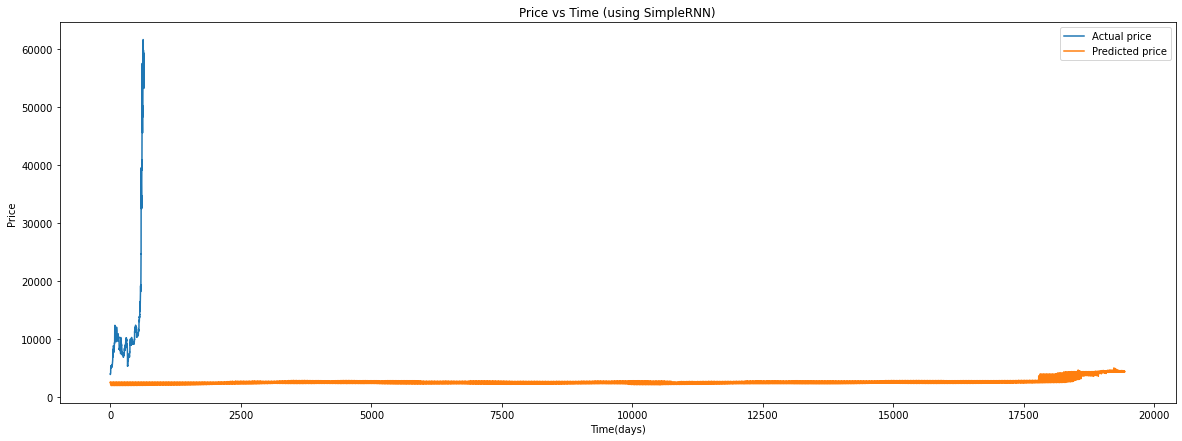

In [34]:
plt.figure(figsize = (20,7))
plt.plot(data_test,'-')
plt.plot(rnn_pred,'-')
plt.xlabel('Time(days)')
plt.ylabel('Price')
plt.title('Price vs Time (using SimpleRNN)')
plt.legend(['Actual price', 'Predicted price'])
plt.show()

The error is very large

# 2)Random Forest Regressor

splitting into training and test sets

In [35]:
dfc=df.copy()

In [36]:
from sklearn.model_selection import train_test_split
traincol=['Open','High','Low','Volume_(BTC)','Volume_(Currency)'	,'Weighted_Price','Year']
x=dfc[traincol]
y=dfc['Close']

x_train_rf,x_test_rf,y_train_rf,y_test_rf=train_test_split(x,y,test_size=0.2,random_state=0)
x_train_rf.shape,x_test_rf.shape,y_train_rf.shape,y_test_rf.shape

((221492, 7), (55374, 7), (221492,), (55374,))

In [37]:
y_test_rf


Date
2014-03-14     628.54
2013-05-10     117.10
2018-12-01    3956.42
2019-06-10    7722.12
2014-08-24     504.80
               ...   
2017-04-15    1176.53
2013-06-11     105.64
2016-08-04     566.15
2012-11-15      10.98
2014-04-18     479.98
Name: Close, Length: 55374, dtype: float64

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error


In [39]:
train_error=[]
test_error=[]
minDepth=20
maxDepth=40
models=[]
for depth in range(minDepth,maxDepth,5):
    regr=RandomForestRegressor(max_depth=depth, random_state=0,n_estimators=5,verbose=2)
    regr.fit(x_train_rf, y_train_rf)
    models.append(regr)
    tr_error=math.sqrt(mean_squared_error(regr.predict(x_train_rf),y_train_rf))
    te_error=math.sqrt(mean_squared_error(regr.predict(x_test_rf),y_test_rf))
    test_error.append(tr_error)
    train_error.append(te_error)
    print (depth,tr_error,te_error)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 5


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


20 9.295455827565846 19.63374944528766
building tree 1 of 5


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


25 9.132018082761238 19.624554859689653
building tree 1 of 5


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


30 9.113334863656982 19.51220208002197
building tree 1 of 5


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


building tree 2 of 5
building tree 3 of 5
building tree 4 of 5
building tree 5 of 5


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


35 9.131540075770118 19.667986348642955


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [40]:
train_error,test_error

([19.63374944528766,
  19.624554859689653,
  19.51220208002197,
  19.667986348642955],
 [9.295455827565846, 9.132018082761238, 9.113334863656982, 9.131540075770118])

In [41]:
predicted_train=regr.predict(x_train_rf)
predicted_train

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


array([ 8177.076,   634.92 , 56281.616, ...,   405.684,   922.838,
         368.87 ])

In [43]:
predt=pd.DataFrame({'Close_predicted':predicted_train},index=x_train_rf.index)
predt

,Close_predicted
Date,
2017-11-24,8177.076
2014-03-16,634.920
2021-03-17,56281.616
2016-06-16,707.448
2014-07-27,595.698
...,...
2018-12-25,3790.404
2015-03-11,290.674
2016-03-19,405.684


In [44]:
anss=pd.concat([predt,y_train_rf],axis=1)
anss


,Close_predicted,Close
Date,,
2017-11-24,8177.076,8177.07
2014-03-16,634.920,634.92
2021-03-17,56281.616,56248.63
2016-06-16,707.448,705.62
2014-07-27,595.698,595.74
...,...,...
2018-12-25,3790.404,3791.23
2015-03-11,290.674,290.88
2016-03-19,405.684,405.63


In [45]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(predt,y_train_rf)
error

2.3598123786688965

We can clearly see from the table that the predicted values are very close to the actual values.Error is very less. Random forest is a good model for our prediction.

Now, predicting for the test set.

In [46]:
predicted_test=regr.predict(x_test_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


In [47]:
predtest=pd.DataFrame({'Close_predicted_test':predicted_test},index=x_test_rf.index)

In [48]:
predicted=pd.concat([predtest,y_test_rf],axis=1)
predicted

,Close_predicted_test,Close
Date,,
2014-03-14,626.568,628.54
2013-05-10,117.614,117.10
2018-12-01,3959.640,3956.42
2019-06-10,7715.448,7722.12
2014-08-24,503.794,504.80
...,...,...
2017-04-15,1176.484,1176.53
2013-06-11,105.380,105.64
2016-08-04,567.866,566.15


In [64]:

error_test_rf=mean_absolute_error(predicted_test,y_test_rf)
error_test_rf

5.868719349498797

The error in the test data is also low

# 3) RNN(LSTM)


In [49]:

model=Sequential()

model.add(LSTM(64,input_shape=(x_train_rnn.shape[1],1),activation="relu"))


model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

hist=model.fit(x_train_rnn,y_train_rnn,epochs=100,batch_size=40,validation_split=0.1)

Epoch 1/100
58/58 [==============================] - 3s 23ms/step - loss: 0.2639 - val_loss: 0.1779
Epoch 2/100
58/58 [==============================] - 1s 20ms/step - loss: 0.0212 - val_loss: 0.0306
Epoch 3/100
58/58 [==============================] - 1s 19ms/step - loss: 0.0136 - val_loss: 0.0237
Epoch 4/100
58/58 [==============================] - 1s 19ms/step - loss: 0.0093 - val_loss: 0.0133
Epoch 5/100
58/58 [==============================] - 1s 19ms/step - loss: 0.0078 - val_loss: 0.0174
Epoch 6/100
58/58 [==============================] - 1s 19ms/step - loss: 0.0078 - val_loss: 0.0117
Epoch 7/100
58/58 [==============================] - 1s 19ms/step - loss: 0.0078 - val_loss: 0.0186
Epoch 8/100
58/58 [==============================] - 1s 19ms/step - loss: 0.0077 - val_loss: 0.0106
Epoch 9/100
58/58 [==============================] - 1s 19ms/step - loss: 0.0065 - val_loss: 0.0132
Epoch 10/100
58/58 [==============================] - 1s 19ms/step - loss: 0.0065 - val_loss: 0.0076

In [50]:
model.save('/model/timeseries_price_LSTM.h5')

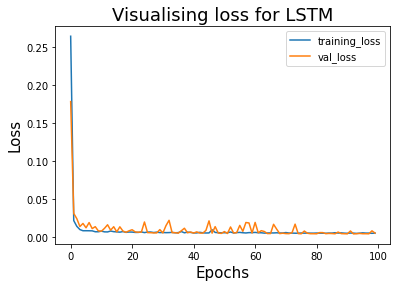

In [51]:
#plot loss for LSTM
training_loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(training_loss,label='training_loss')
plt.plot(val_loss,label='val_loss')
plt.legend()
plt.title('Visualising loss for LSTM',fontsize=18)
plt.xlabel('Epochs',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.show()

In [52]:
pred

array([[[0.2615667 ],
        [0.3008917 ],
        [0.28984267],
        ...,
        [0.08370519],
        [0.08369984],
        [0.0836584 ]],

       [[0.26294595],
        [0.29992554],
        [0.2898767 ],
        ...,
        [0.08372732],
        [0.08367773],
        [0.08357528]],

       [[0.2508495 ],
        [0.3006254 ],
        [0.291648  ],
        ...,
        [0.08370306],
        [0.08359307],
        [0.08299004]],

       ...,

       [[0.96728796],
        [0.96697325],
        [0.9531978 ],
        ...,
        [0.8869684 ],
        [0.8993766 ],
        [0.899361  ]],

       [[0.9699107 ],
        [0.96368647],
        [0.9500527 ],
        ...,
        [0.8993774 ],
        [0.89936155],
        [0.9068342 ]],

       [[0.9423041 ],
        [0.9481168 ],
        [0.9648053 ],
        ...,
        [0.8993621 ],
        [0.9068346 ],
        [0.91696143]]], dtype=float32)

In [53]:
pred = model.predict(x_test_rnn)          #making prediction
lstm_pred=min_max_scaler.inverse_transform(pred)


In [67]:

error_lstm=mean_absolute_error(pred,y_test_rnn)
error_lstm

0.02109665201619315

In [54]:
print('MSE : ' + str(mean_squared_error(y_test_rnn, pred)))
rnn_score = r2_score(y_test_rnn,pred)
print("R2 Score of LSTM model = ",rnn_score)

MSE : 0.0006609879264100597
R2 Score of LSTM model =  0.9843374090603104


The error is very low. LSTM model is a better fit than random forests.

In [55]:
lstm_pred.shape

(648, 1)

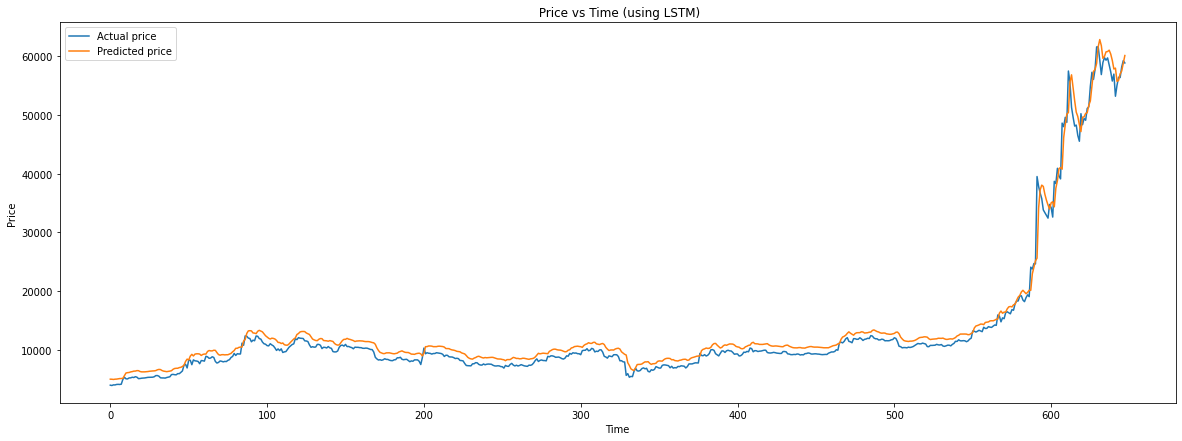

In [56]:
plt.figure(figsize = (20,7))
plt.plot(data_test,'-')
plt.plot(lstm_pred,'-')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(' Price vs Time (using LSTM)')
plt.legend(['Actual price', 'Predicted price'])
plt.show()

#Predicting bitcoin value for next 30 days using LSTM 

In [60]:
values=x_test_rnn[-30]


In [61]:
for i in range(30):  
    kl=values[i:timestep+i].reshape(1,timestep,1)       
    values=np.append(values,model.predict(kl),axis=0)   ##append predicted data using previous 30 days 

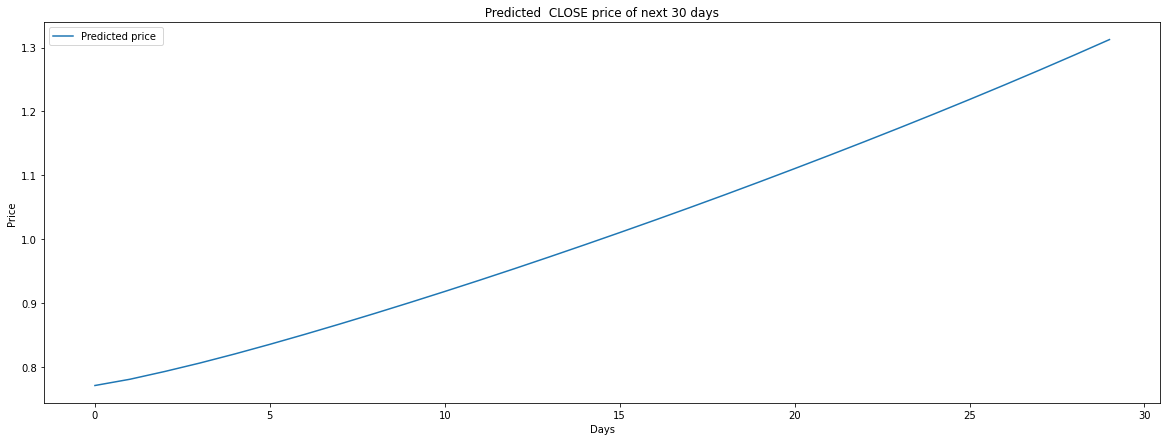

In [62]:
#plot price for coming 30 days
plt.figure(figsize = (20,7))
plt.plot(values[30:],'-',label='Predicted price ')

plt.xlabel('Days')
plt.ylabel('Price')
plt.title(' Predicted  CLOSE price of next 30 days ')
plt.legend()
plt.show()

CONCLUSION:

1)The bitcoin price will increase almost linearly for the next 30 days

2)It would be profitable to invest in bitcoin 

3)The investor need not check price everyday as it wont decrease

4)Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies.

5)RNN using LSTM and  Random Forests have predicted great values for the test sets

6) LSTM is used to predict the value for next 30 days.
